<a href="https://colab.research.google.com/github/JulietteMaes01/University-Projects/blob/main/ACML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 : Convolutional Autoencoder



In [ ]:
#import librairies
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

import pdb


Network architecture: 9 layers

input: 32x32x3 (3 channels)

*Encoder*
* Filter : 3x3 and 8 channels
* Maxpooling : 2x2
* Filter : 3x3 and 12 channels
* Maxpooling : 2x2


*Latent Space Representation*


* Filter : 3x3 and 16 channels


*Decoder*
* Upsampling : 2x2
* Filter : 3x3 and 12 channels
* Upsampling : 2x2

output : 32x32x3 (3 channels)

In [ ]:
# #Network architecture:

# input = tf.keras.Input(shape=(32, 32, 3))

# #Encode
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(input)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(12, (3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)

# #Decode
# x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(12, (3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D((2, 2))(x)


# output = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)

# #Create and compile the AE model
# AE = models.Model(input, output)

# AE.compile(optimizer='adam', loss='mean_squared_error')

# AE.summary()

# Exercise 1

In [ ]:
#Exercise 1
#Divide data set : training = 80%, validation = 10%, test = 10%

(x_train, _), (x_test, _) = cifar10.load_data() #no need of y_train (nor y-pred) as unsupervised technique that is not learning to predict output as output = input in AE

full_set = np.concatenate((x_train, x_test), axis=0)
print(f"size of full_set : {full_set.shape}" )


x_train, x_test = train_test_split(full_set, test_size=0.2, random_state=42) #80% training --> Cifar is already divided into 50000 training and 10000 testing
x_val, x_test = train_test_split(x_test, test_size=0.5, random_state=42) #20%/2 to have 10% validation and 10% test

#normalize the data
x_train_norm = x_train.astype('float32') / 255.
x_val_norm = x_val.astype('float32') / 255.
x_test_norm = x_test.astype('float32') / 255.

#verify datasets
print(f"Training set = {x_train_norm.shape}")
print(f"Validation set = {x_val_norm.shape}")
print(f"Testing set = {x_test_norm.shape}")



170498071/170498071 [==============================] - 4s 0us/step
size of full_set : (60000, 32, 32, 3)
Training set = (48000, 32, 32, 3)
Validation set = (6000, 32, 32, 3)
Testing set = (6000, 32, 32, 3)


In [ ]:
# #implement AE network from before

# # model = autoencoder = AE

# #Run the training for at least 10 epochs, and plot the evolution of the error with epochs
# epoch = 10
# batch_size = 64


# trained_model = AE.fit(x_train_norm, x_train_norm, epochs=epoch, batch_size=batch_size, validation_data=(x_val_norm, x_val_norm))

# plt.plot(trained_model.history['loss'], label='Training Loss')
# plt.plot(trained_model.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Mean Squared Error')
# plt.legend()
# plt.show()

# #Report also the test error.
# test_error = AE.evaluate(x_test_norm, x_test_norm)
# print(f"Test Error: {test_error}")



In [ ]:
# #Plot some images to see how the model reconstruct the images
# ## From Iulian

# reconstructed_images = AE.predict(x_test_norm)

# n = 10  # Number of images to display
# plt.figure(figsize=(20, 4))
# for i in range(n):
#     #original images
#     ax = plt.subplot(2, n, i + 1)
#     plt.imshow(x_test_norm[i].reshape(32, 32, 3))
#     plt.title("Original")
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     #reconstructed images
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.imshow(reconstructed_images[i].reshape(32, 32, 3))
#     plt.title("Reconstructed")
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()


 # Exercise 2

In [ ]:
#Exercise 2
#Try other architectures

#define different architectures:
##dictionnary of scenarios containing each a dictionnary of phases (encoding, decoding, output) that each contain an array of layers

architectures= {
    'base' : {'encoding': [
                            { 'Conv2D' : {'channels' : 8, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            },
                            { 'Conv2D' : {'channels' : 12, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            }
                            ],
                'decoding' : [
                             { 'Conv2D' : {'channels' : 16, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'}, #this is the latent space representation
                               'UpSampling2D' : {'filter' : 2},

                             },
                             { 'Conv2D' : {'channels' : 12, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'},
                               'UpSampling2D' : {'filter' : 2},

                             }],
              'output' : {'Conv2D' : {'channels' : 3, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'}},
              'compile' : {'optimizer' : 'adam', 'loss' : 'mean_squared_error'}


    },
    'base_simple' : {'encoding': [
                            { 'Conv2D' : {'channels' : 8, 'filter' : 4, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            }
                            ],
                'decoding' : [
                             { 'Conv2D' : {'channels' : 16, 'filter' : 4, 'activation' : 'relu', 'padding' : 'same'}, #this is the latent space representation
                               'UpSampling2D' : {'filter' : 2},

                            }],
              'output' : {'Conv2D' : {'channels' : 3, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'}},
              'compile' : {'optimizer' : 'adam', 'loss' : 'mean_squared_error'}


    },
    'base_simple_color' : {'encoding': [
                            { 'Conv2D' : {'channels' : 8, 'filter' : 4, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            }
                            ],
                'decoding' : [
                             { 'Conv2D' : {'channels' : 16, 'filter' : 4, 'activation' : 'relu', 'padding' : 'same'}, #this is the latent space representation
                               'UpSampling2D' : {'filter' : 2},

                            }],
              'output' : {'Conv2D' : {'channels' : 2, 'filter' : 3, 'activation' : 'softmax', 'padding' : 'same'}},
              'compile' : {'optimizer' : 'adam', 'loss' : 'mean_squared_error'}


    },
    'filter5' : {'encoding': [
                            { 'Conv2D' : {'channels' : 16, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            },
                            { 'Conv2D' : {'channels' : 24, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            }
                            ],
                'decoding' : [
                             { 'Conv2D' : {'channels' : 32, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'}, #this is the latent space representation
                               'UpSampling2D' : {'filter' : 2},

                             },
                             { 'Conv2D' : {'channels' : 24, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
                               'UpSampling2D' : {'filter' : 2},

                             }],
              'output' : {'Conv2D' : {'channels' : 3, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'}},
              'compile' : {'optimizer' : 'adam', 'loss' : 'mean_squared_error'}


  },


    'base_simple_filter5' : {'encoding': [
                            { 'Conv2D' : {'channels' : 8, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},
                            }
                            ],
                'decoding' : [
                             { 'Conv2D' : {'channels' : 16, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'}, #this is the latent space representation
                               'UpSampling2D' : {'filter' : 2},
                             }],
              'output' : {'Conv2D' : {'channels' : 3, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'}},
              'compile' : {'optimizer' : 'adam', 'loss' : 'mean_squared_error'}


  },
        'base_simple_filter5_color' : {'encoding': [
                            { 'Conv2D' : {'channels' : 8, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},
                            }
                            ],
                'decoding' : [
                             { 'Conv2D' : {'channels' : 16, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'}, #this is the latent space representation
                               'UpSampling2D' : {'filter' : 2},
                             }],
              'output' : {'Conv2D' : {'channels' : 2, 'filter' : 3, 'activation' : 'softmax', 'padding' : 'same'}},
              'compile' : {'optimizer' : 'adam', 'loss' : 'mean_squared_error'}


  },
    # 'deep' : {'encoding': [
    #                         { 'Conv2D' : {'channels' : 10, 'filter' : 4, 'activation' : 'relu', 'padding' : 'same'},
    #                           'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

    #                         },
    #                         { 'Conv2D' : {'channels' : 15, 'filter' : 4, 'activation' : 'relu', 'padding' : 'same'},
    #                           'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

    #                         },
    #                         { 'Conv2D' : {'channels' : 20, 'filter' : 4, 'activation' : 'relu', 'padding' : 'same'},
    #                           'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

    #                         }
    #                         ],
    #             'decoding' : [
    #                          { 'Conv2D' : {'channels' : 25, 'filter' : 4, 'activation' : 'relu', 'padding' : 'same'}, #this is the latent space representation
    #                            'UpSampling2D' : {'filter' : 2},

    #                          },
    #                          { 'Conv2D' : {'channels' : 20, 'filter' : 4, 'activation' : 'relu', 'padding' : 'same'},
    #                            'UpSampling2D' : {'filter' : 2},

    #                          },
    #                           { 'Conv2D' : {'channels' : 15, 'filter' : 4, 'activation' : 'relu', 'padding' : 'same'},
    #                            'UpSampling2D' : {'filter' : 2},

    #                          }],
    #           'output' : {'Conv2D' : {'channels' : 3, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'}},
    #           'compile' : {'optimizer' : 'adam', 'loss' : 'mean_squared_error'}


    # },
    ### MAKES THE MODEL CRASH - NOT GOOD EITHER WAY bc too deep for such small resolution images
    'base_sigmoid' : {'encoding': [
                            { 'Conv2D' : {'channels' : 8, 'filter' : 3, 'activation' : 'sigmoid', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            },
                            { 'Conv2D' : {'channels' : 12, 'filter' : 3, 'activation' : 'sigmoid', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            }
                            ],
                'decoding' : [
                             { 'Conv2D' : {'channels' : 16, 'filter' : 3, 'activation' : 'sigmoid', 'padding' : 'same'}, #this is the latent space representation
                               'UpSampling2D' : {'filter' : 2},

                             },
                             { 'Conv2D' : {'channels' : 12, 'filter' : 3, 'activation' : 'sigmoid', 'padding' : 'same'},
                               'UpSampling2D' : {'filter' : 2},

                             }],
              'output' : {'Conv2D' : {'channels' : 3, 'filter' : 3, 'activation' : 'sigmoid', 'padding' : 'same'}},
              'compile' : {'optimizer' : 'adam', 'loss' : 'mean_squared_error'}


    },
    # # 'base_valid' : {'encoding': [
    # #                         { 'Conv2D' : {'channels' : 8, 'filter' : 3, 'activation' : 'relu', 'padding' : 'valid'},
    # #                           'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

    # #                         },
    # #                         { 'Conv2D' : {'channels' : 12, 'filter' : 3, 'activation' : 'relu', 'padding' : 'valid'},
    # #                           'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

    # #                         }
    # #                         ],
    # #             'decoding' : [
    # #                          { 'Conv2D' : {'channels' : 16, 'filter' : 3, 'activation' : 'relu', 'padding' : 'valid'}, #this is the latent space representation
    # #                            'UpSampling2D' : {'filter' : 2},

    # #                          },
    # #                          { 'Conv2D' : {'channels' : 12, 'filter' : 3, 'activation' : 'relu', 'padding' : 'valid'},
    # #                            'UpSampling2D' : {'filter' : 2},

    # #                          }],
    # #           'output' : {'Conv2D' : {'channels' : 3, 'filter' : 3, 'activation' : 'relu', 'padding' : 'valid'}},
    # #           'compile' : {'optimizer' : 'adam', 'loss' : 'mean_squared_error'}


    # # },
    # #####VALID PADDING FAILS - To be investigated later
    'base_sgd' : {'encoding': [
                            { 'Conv2D' : {'channels' : 8, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            },
                            { 'Conv2D' : {'channels' : 12, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            }
                            ],
                'decoding' : [
                             { 'Conv2D' : {'channels' : 16, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'}, #this is the latent space representation
                               'UpSampling2D' : {'filter' : 2},

                             },
                             { 'Conv2D' : {'channels' : 12, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'},
                               'UpSampling2D' : {'filter' : 2},

                             }],
              'output' : {'Conv2D' : {'channels' : 3, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'}},
              'compile' : {'optimizer' : 'SGD', 'loss' : 'mean_squared_error'}


    },
    # 'deep5' : {'encoding': [
    #                         { 'Conv2D' : {'channels' : 10, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
    #                           'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

    #                         },
    #                         { 'Conv2D' : {'channels' : 15, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
    #                           'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

    #                         },
    #                         { 'Conv2D' : {'channels' : 20, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
    #                           'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

    #                         }
    #                         ],
    #             'decoding' : [
    #                          { 'Conv2D' : {'channels' : 25, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'}, #this is the latent space representation
    #                            'UpSampling2D' : {'filter' : 2},

    #                          },
    #                          { 'Conv2D' : {'channels' : 20, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
    #                            'UpSampling2D' : {'filter' : 2},

    #                          },
    #                         { 'Conv2D' : {'channels' : 10, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
    #                           'UpSampling2D' : {'filter' : 2},

    #                          }],
    #           'output' : {'Conv2D' : {'channels' : 3, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'}},
    #           'compile' : {'optimizer' : 'adam', 'loss' : 'mean_squared_error'}


    # },
    ### MAKES THE MODEL CRASH - NOT GOOD EITHER WAY bc too deep

        'deep5_color' : {'encoding': [
                            { 'Conv2D' : {'channels' : 10, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            },
                            { 'Conv2D' : {'channels' : 15, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            },
                            { 'Conv2D' : {'channels' : 20, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            }
                            ],
                'decoding' : [
                             { 'Conv2D' : {'channels' : 25, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'}, #this is the latent space representation
                               'UpSampling2D' : {'filter' : 2},

                             },
                             { 'Conv2D' : {'channels' : 20, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
                               'UpSampling2D' : {'filter' : 2},

                             },
                            { 'Conv2D' : {'channels' : 10, 'filter' : 5, 'activation' : 'relu', 'padding' : 'same'},
                              'UpSampling2D' : {'filter' : 2},

                             }],
              'output' : {'Conv2D' : {'channels' : 2, 'filter' : 3, 'activation' : 'softmax', 'padding' : 'same'}},
              'compile' : {'optimizer' : 'adam', 'loss' : 'mean_squared_error'}


    },
    'base_No_opt' : {'encoding': [
                            { 'Conv2D' : {'channels' : 8, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            },
                            { 'Conv2D' : {'channels' : 12, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'},
                              'MaxPooling2D' : {'filter' : 2, 'padding' : 'same'},

                            }
                            ],
                'decoding' : [
                             { 'Conv2D' : {'channels' : 16, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'}, #this is the latent space representation
                               'UpSampling2D' : {'filter' : 2},

                             },
                             { 'Conv2D' : {'channels' : 12, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'},
                               'UpSampling2D' : {'filter' : 2},

                             }],
              'output' : {'Conv2D' : {'channels' : 3, 'filter' : 3, 'activation' : 'relu', 'padding' : 'same'}},
              'compile' : {'optimizer' : None, 'loss' : 'mean_squared_error'}


    },

}



In [ ]:
#create a function that builds network based on architecture defined in dictionary

def build_model(name, architecture, channels=3, no_color=True):
    # if no_color and name == 'base_simple_color':
    #     print("Skipping base_simple_color architecture.")
    #     return tf.keras.Sequential()  # Placeholder model with no layers

    input = tf.keras.Input(shape=(32, 32, channels))

    encoding_layers = architecture['encoding']
    decoding_layers = architecture['decoding']

    x = input
    for _layer in encoding_layers:
        x = layers.Conv2D(_layer['Conv2D']['channels'], (_layer['Conv2D']['filter'], _layer['Conv2D']['filter']),
                          activation=_layer['Conv2D']['activation'], padding=_layer['Conv2D']['padding'])(x)
        x = layers.MaxPooling2D((_layer['MaxPooling2D']['filter'], _layer['MaxPooling2D']['filter']),
                                padding=_layer['MaxPooling2D']['padding'])(x)

    for _layer in decoding_layers:
        x = layers.Conv2D(_layer['Conv2D']['channels'], (_layer['Conv2D']['filter'], _layer['Conv2D']['filter']),
                          activation=_layer['Conv2D']['activation'], padding=_layer['Conv2D']['padding'])(x)
        x = layers.UpSampling2D((_layer['UpSampling2D']['filter'], _layer['UpSampling2D']['filter']))(x)

    output_layer = architecture['output']
    output = layers.Conv2D(output_layer['Conv2D']['channels'],
                           (output_layer['Conv2D']['filter'], output_layer['Conv2D']['filter']),
                           activation=output_layer['Conv2D']['activation'], padding=output_layer['Conv2D']['padding'])(x)

    AE_model = models.Model(input, output, name=name)

    compile_params = architecture['compile']

    if compile_params['optimizer'] is not None:
        AE_model.compile(optimizer=compile_params['optimizer'], loss=compile_params['loss'])
    else:
        AE_model.compile(loss=compile_params['loss'])

    return AE_model


In [ ]:
def train_model(_model, _xtrain, _xval, _epochs=10):
    batch_size = 64
    trained_model = _model.fit(_xtrain, _xtrain, epochs=_epochs, batch_size=batch_size, validation_data=(_xval, _xval))
    return trained_model


def plot_model_training_stats(_model):
  # print(_model.history)
  plt.plot(_model.history['loss'], label='Training Loss')
  plt.plot(_model.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error')
  plt.legend()
  plt.show()
  return


def report_test_error(_model, _xtest):
  test_error = _model.evaluate(_xtest, _xtest)
  print(f"Test Error: {test_error}")
  return

def add_images_to_grid(_model, _xtest, _grid):
  reconstructed_images = _model.predict(_xtest)
  _grid.append({'name': _model.name,
               'data' :reconstructed_images})
  return

def display_grid(_grid):
  n = 8  # Number of images to display (should be enoigh t get a good feel)

  # Create a figure with num_rows rows and num_cols columns
  fig, axes = plt.subplots(len(_grid), n, figsize=(32, 16)) #,layout="constrained")
  # Adjust the layout of the subplots to leave enough room for the labels
  plt.subplots_adjust(left=0.5)
  # Plot the images and labels

  #for j in range(n):
  for i,_serie in enumerate(_grid):
       for j in range(n):
            ax = axes[i, j]
            _serie['data'][j] = _serie['data'][j] / _serie['data'][j].max()

            ax.imshow(_serie['data'][j].reshape(32, 32, 3))
            #plt.imshow(_serie['data'][j].reshape(32, 32, 3))
            ax.get_xaxis().set_visible(False)
            # Hide the Y-axis tick labels
            ax.set_yticklabels([])
            ax.set_yticks([])
            #ax.get_yaxis().set_visible(False)
            #ax.axis('off')
             # Add the label to the leftmost subplot of the row
            if j == 0:
              #print(_serie['name'])
              y_label_pos = (2.15, 2.10)
              ax.set_ylabel(_serie['name'],rotation=0, size='x-large',
                   ha='right', va='center')
              # Hide the left axis spine
              ax.spines['left'].set_visible(False)
              ax.spines['top'].set_visible(False)
              ax.spines['right'].set_visible(False)
              ax.spines['bottom'].set_visible(False)



    # Adjust the layout and show the plot
    #plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
  fig.tight_layout();
  plt.show()


Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 12)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          1744   

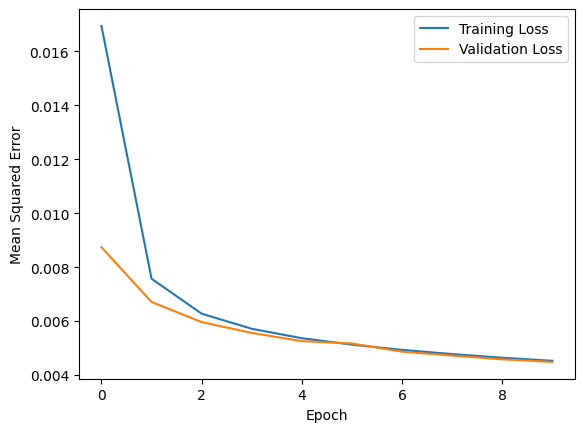

188/188 [==============================] - 1s 3ms/step - loss: 0.0045
Test Error: 0.004454906098544598
188/188 [==============================] - 1s 2ms/step
Model: "base_simple"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 8)         392       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 16)        2064      
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 32, 32, 16)        0         
 g2D)                        

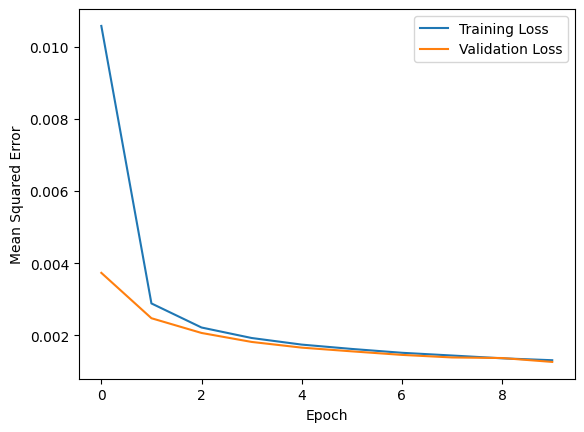

188/188 [==============================] - 1s 3ms/step - loss: 0.0013
Test Error: 0.001251294743269682
188/188 [==============================] - 0s 2ms/step
Skipping base_simple_color architecture.
Model: "filter5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 24)        9624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 24)          0  

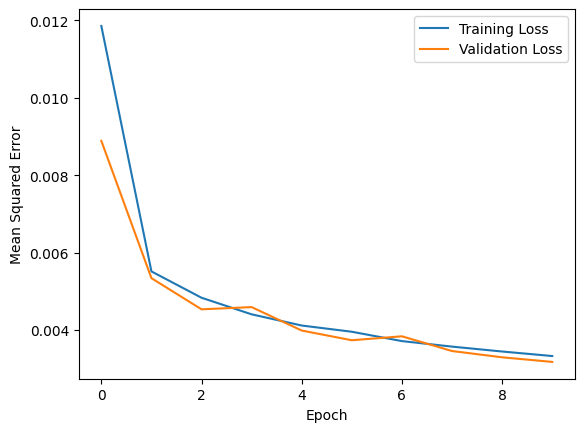

188/188 [==============================] - 1s 4ms/step - loss: 0.0032
Test Error: 0.0031548691913485527
188/188 [==============================] - 1s 3ms/step
Model: "base_simple_filter5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 8)         608       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 16)        3216      
                                                                 
 up_sampling2d_5 (UpSamplin  (None, 32, 32, 16)        0         
 g2D)               

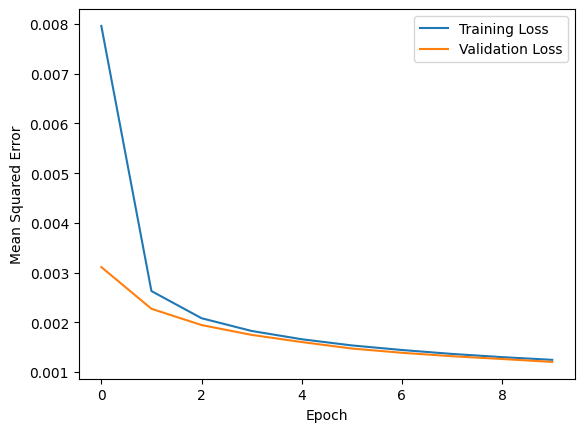

188/188 [==============================] - 1s 3ms/step - loss: 0.0012
Test Error: 0.0011883570114150643
188/188 [==============================] - 1s 3ms/step
Skipping base_simple_filter5_color architecture.
Model: "base_sigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 12

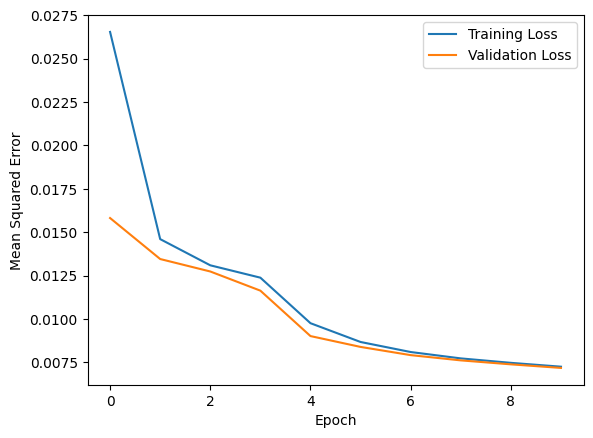

188/188 [==============================] - 1s 3ms/step - loss: 0.0072
Test Error: 0.007205994334071875
188/188 [==============================] - 0s 2ms/step
Model: "base_sgd"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 12)          0         
 g2D)                           

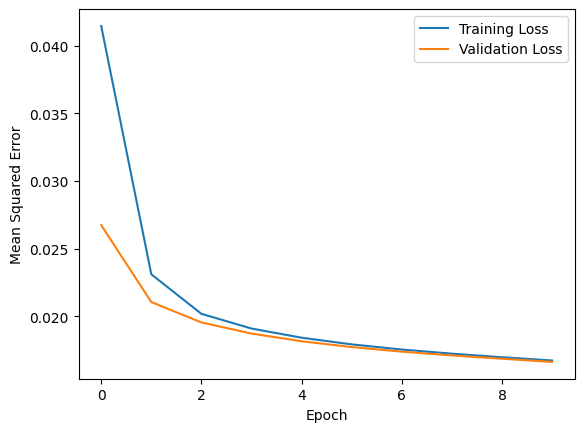

188/188 [==============================] - 1s 3ms/step - loss: 0.0167
Test Error: 0.016698742285370827
188/188 [==============================] - 0s 2ms/step
Skipping deep5_color architecture.
Model: "base_No_opt"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 8)         224       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 12)        876       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 8, 8, 12)          0    

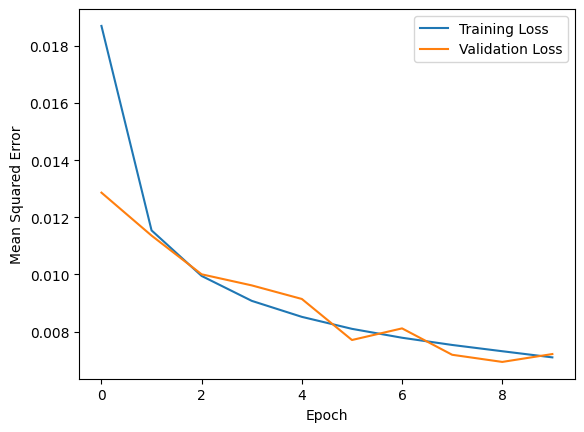

188/188 [==============================] - 1s 3ms/step - loss: 0.0072
Test Error: 0.007224737200886011
188/188 [==============================] - 1s 2ms/step


In [ ]:
output_grid = []  #grid will contain a list of dictionnaries with the name of the dataserie/scenario then the dataitself
output_grid.append({'name' : 'original images', 'data' : x_test_norm})


# List of architectures to skip
architectures_to_skip = ['base_simple_color', 'deep5_color', 'base_simple_filter5_color']

for _key, _value in architectures.items():
    if _key in architectures_to_skip:
        print(f"Skipping {_key} architecture.")
        continue
    AE = build_model(_key, _value)
    AE.summary()



    trained_model = train_model(AE, x_train_norm, x_val_norm)
    plot_model_training_stats(trained_model)
    report_test_error(AE, x_test_norm)

    add_images_to_grid(AE, x_test_norm, output_grid)


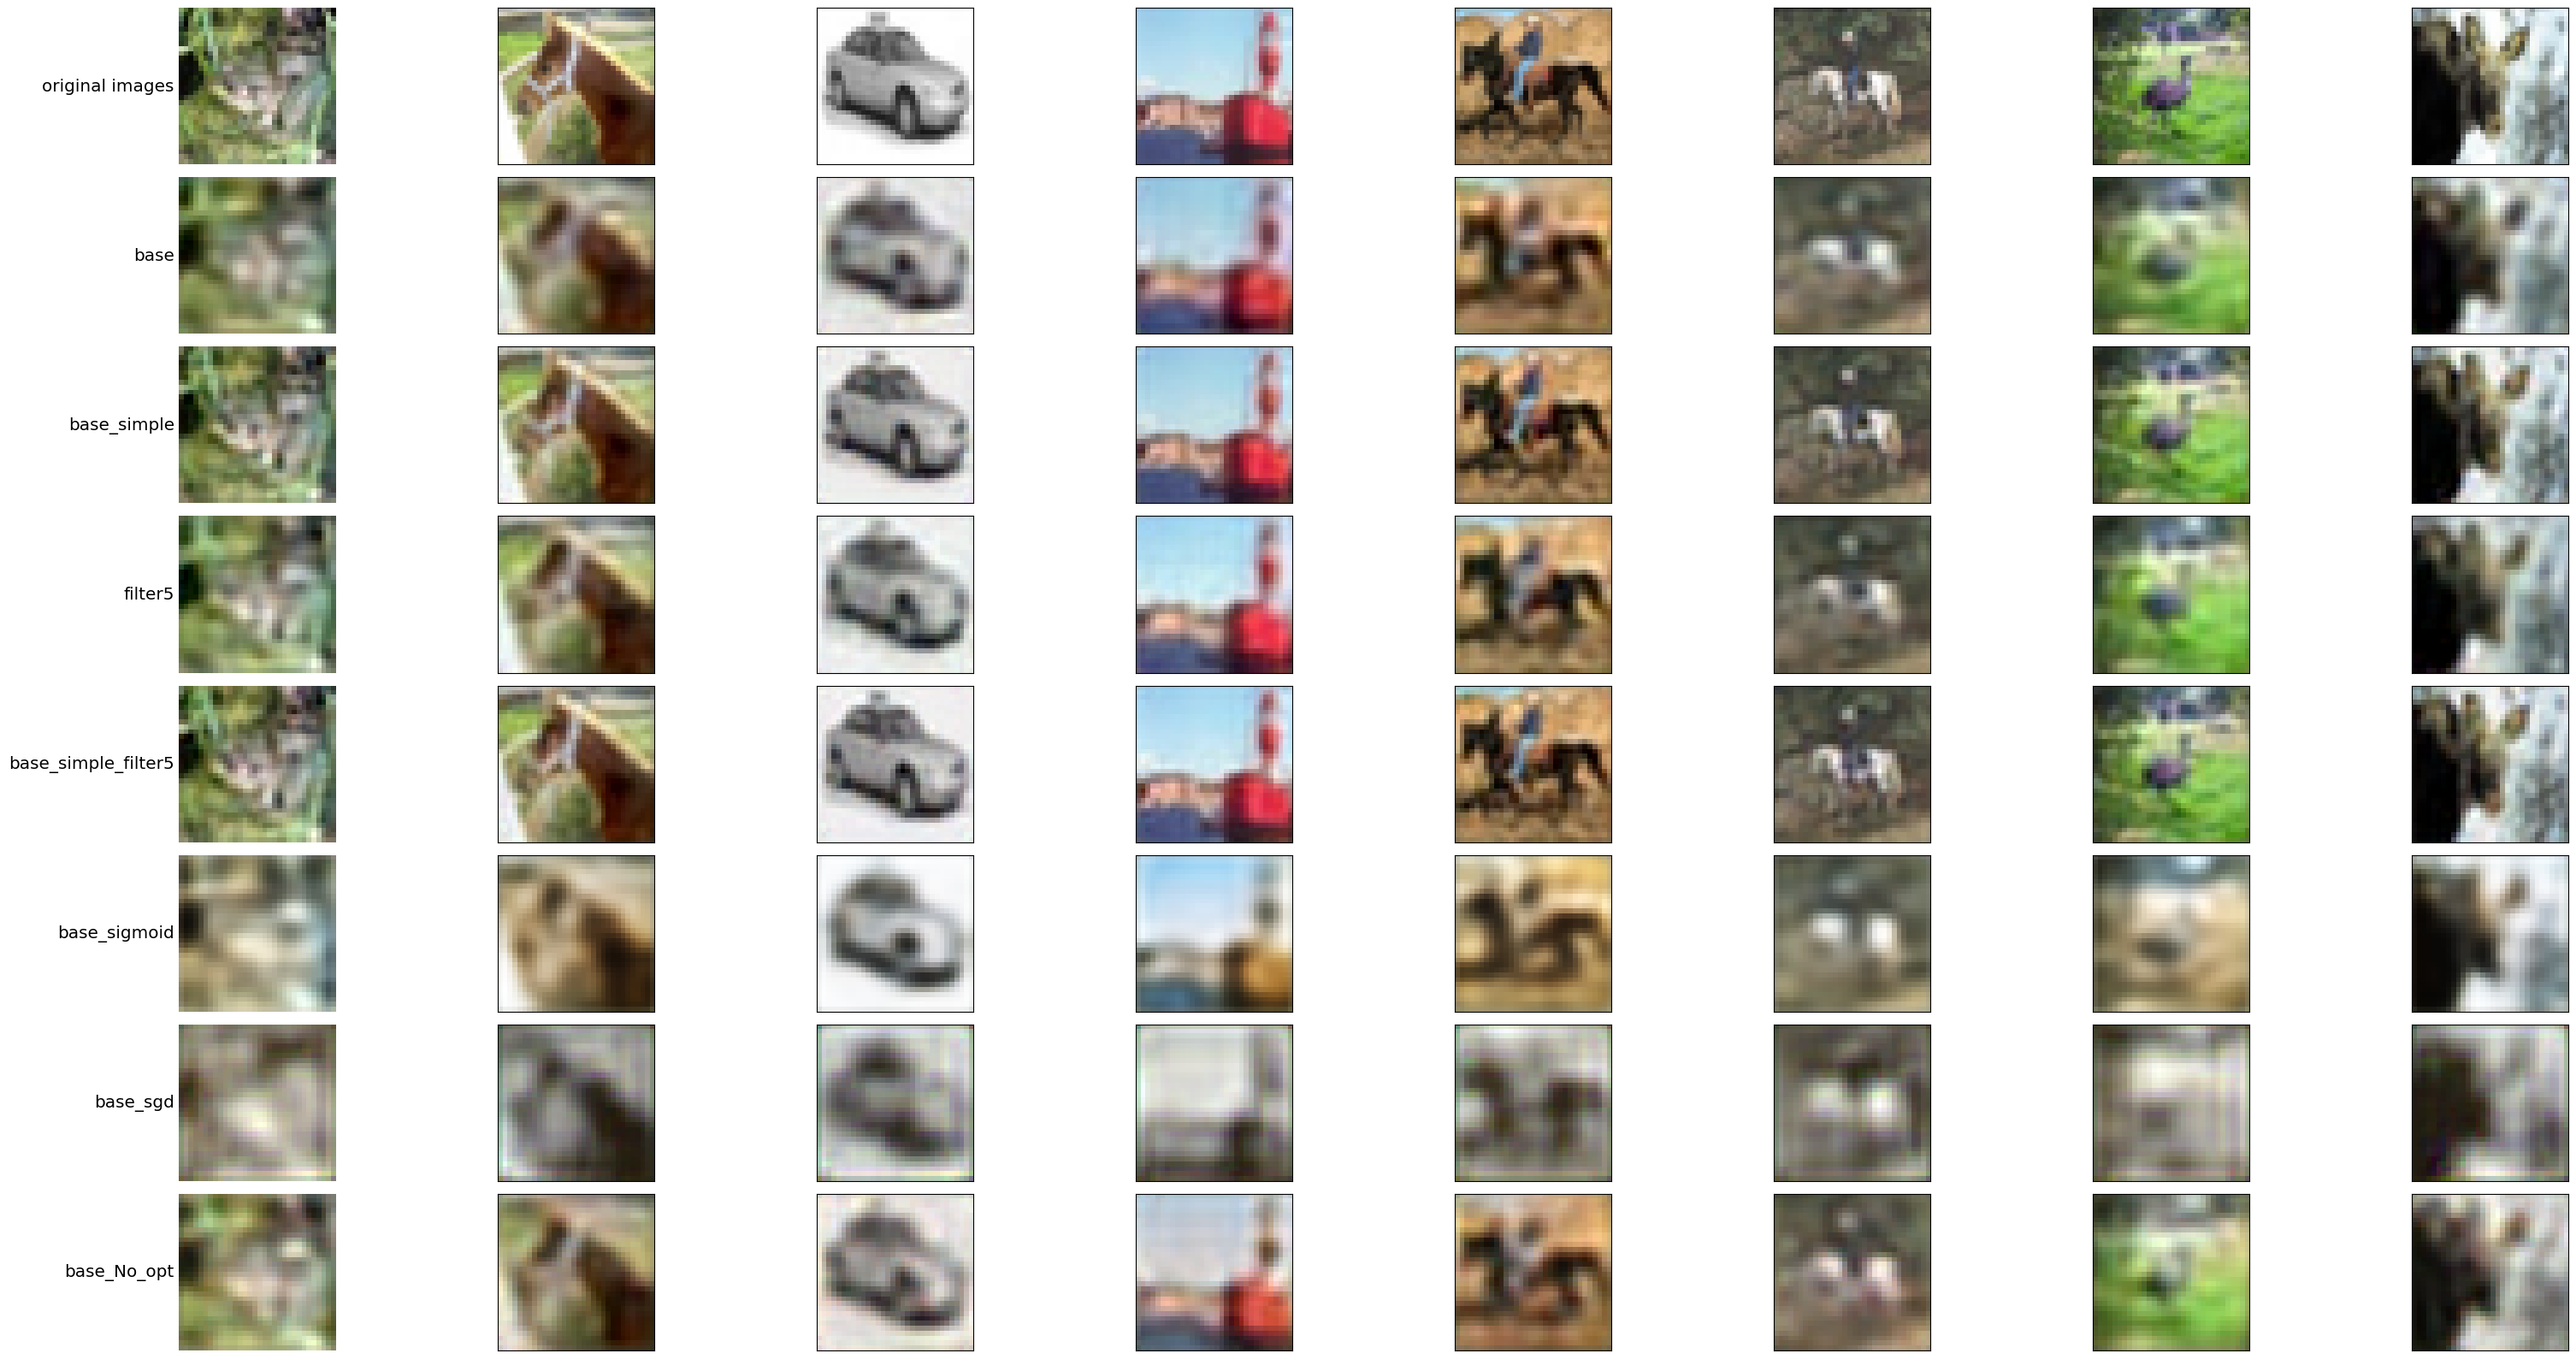

In [ ]:
display_grid(output_grid)

# Exercise 3

In [ ]:
# #use best model: base_simple
# #and train it over more epochs


In [ ]:
#use these functions for colorization
# Convert images to grayscale (YCrCb)
def rgb_to_ycrcb(images):
    ycrcb_images = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb) for img in images])
    y_channel = ycrcb_images[..., 0:1]# / 255.  # Normalize Y channel
    crcb_channels = ycrcb_images[..., 1:]# / 255.  # Normalize Cr and Cb channels
    return y_channel, crcb_channels


def train_color_model(_model, _xtrain_y, _xtrain_crcb , _xval_y, _xval_crcb, _epochs=10):
    batch_size = 64
    trained_model = _model.fit(_xtrain_y, _xtrain_crcb, epochs=_epochs, batch_size=batch_size, shuffle = True, validation_data=(_xval_y, _xval_crcb))
    return trained_model

def report_test_error(_model, _xtest_y, _xtest_crcb):
  test_error = _model.evaluate(_xtest_y, _xtest_crcb)
  print(f"Test Error: {test_error}")
  return

# Function to merge Y channel with CbCr and convert to RGB
def merge_ycrcb_to_rgb(y, crcb):
    ycrcb_image = np.concatenate([y, crcb], axis=-1) * 255  # Rescale to original range
    ycrcb_image = ycrcb_image.astype(np.uint8)
    rgb_image = np.array([cv2.cvtColor(img, cv2.COLOR_YCrCb2RGB) for img in ycrcb_image])
    return rgb_image

def plot_images(original_images, grayscale_images, reconstructed_images, num_images=10):
    """
    Plot original, grayscale, and reconstructed images.

    Parameters:
        original_images (numpy.ndarray): Array of original images.
        grayscale_images (numpy.ndarray): Array of grayscale images.
        reconstructed_images (numpy.ndarray): Array of reconstructed images.
        num_images (int): Number of images to display. Default is 10.
    """

    plt.figure(figsize=(20, 6))

    for i in range(num_images):
        # Display original images
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(original_images[i])
        plt.title("Original")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display grayscale images
        ax = plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(grayscale_images[i].reshape(32, 32), cmap='gray')
        plt.title("Grayscale")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images
        ax = plt.subplot(3, num_images, i + 1 + num_images * 2)
        plt.imshow(reconstructed_images[i])
        plt.title("Reconstructed")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()

In [ ]:
x_train_y, x_train_crcb = rgb_to_ycrcb(x_train_norm)
x_val_y, x_val_crcb = rgb_to_ycrcb(x_val_norm)
x_test_y, x_test_crcb = rgb_to_ycrcb(x_test_norm)

Model: "base_simple_color"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 8)         136       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 16)        2064      
                                                                 
 up_sampling2d_12 (UpSampli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 2)   

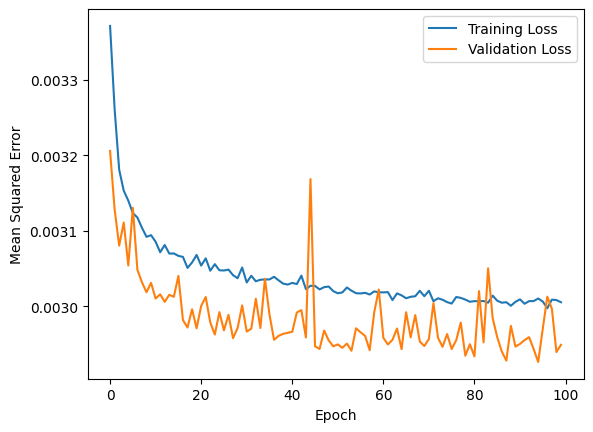

188/188 [==============================] - 1s 3ms/step - loss: 0.0030
Test Error: 0.0029916451312601566


In [ ]:
# Step 3: Build the autoencoder (the model provided in assignment)
# Build and train the model with the updated number of epochs
best_model_key = 'base_simple_color'
best_model_params = architectures[best_model_key]

AE = build_model(best_model_key, best_model_params, channels = 1, no_color = False)
AE.summary()

# Train the model with 20 epochs
trained_model = train_color_model(AE, (x_train_y), (x_train_crcb), (x_val_y), (x_val_crcb), _epochs = 100)


# Plot the training stats
plot_model_training_stats(trained_model)

# Report test error
report_test_error(AE, (x_test_y), (x_test_crcb))

188/188 [==============================] - 0s 2ms/step


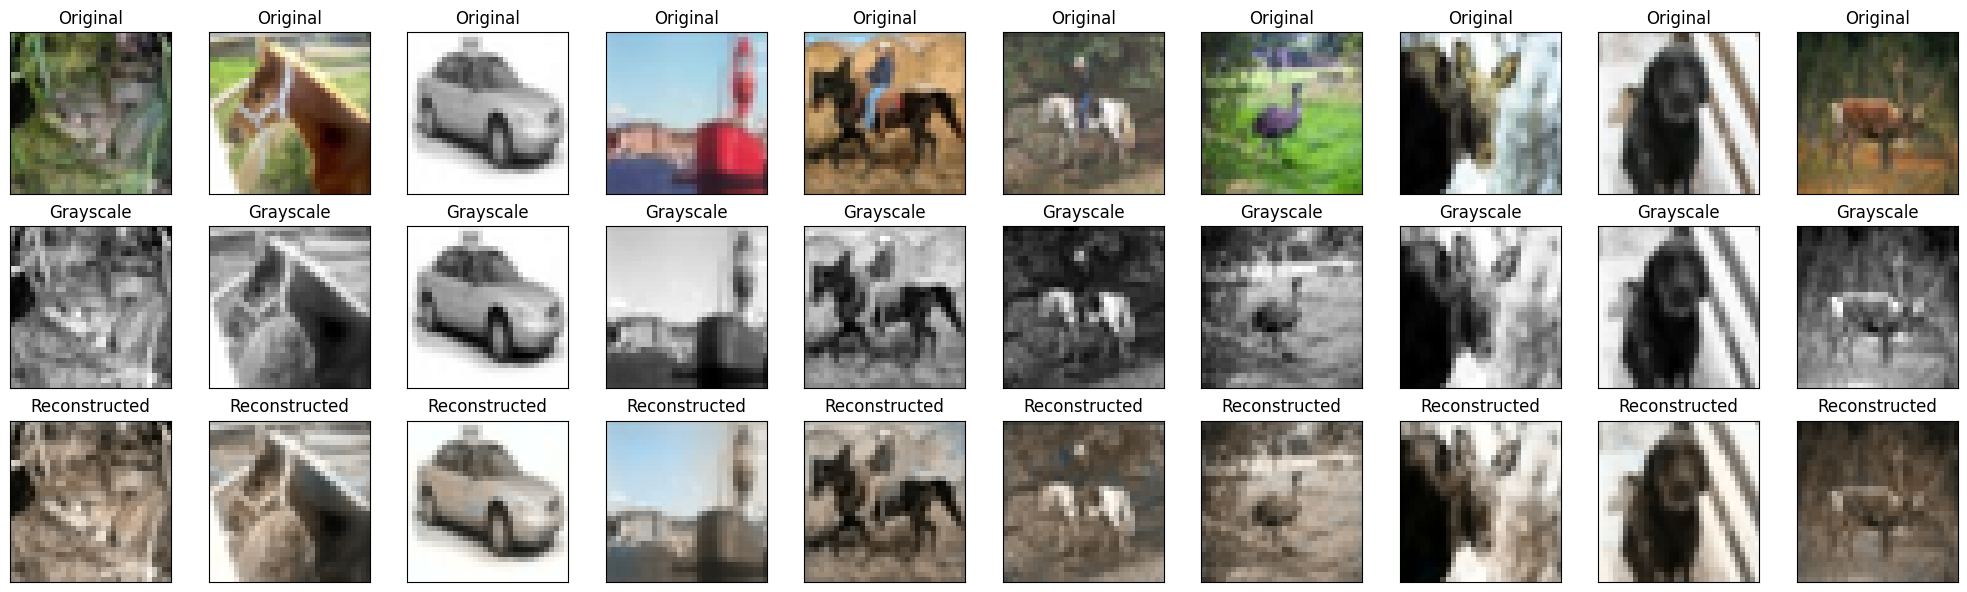

In [ ]:
# Predict the reconstructed Cb and Cr channels
predicted_crcb = AE.predict(x_test_y)

# Merge with Y channel and convert to RGB
reconstructed_images = merge_ycrcb_to_rgb(x_test_y, predicted_crcb)

plot_images(x_test, x_test_y, reconstructed_images)


Model: "deep5_color"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 32, 32, 10)        260       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 16, 16, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 15)        3765      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 8, 8, 15)          0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 20)          

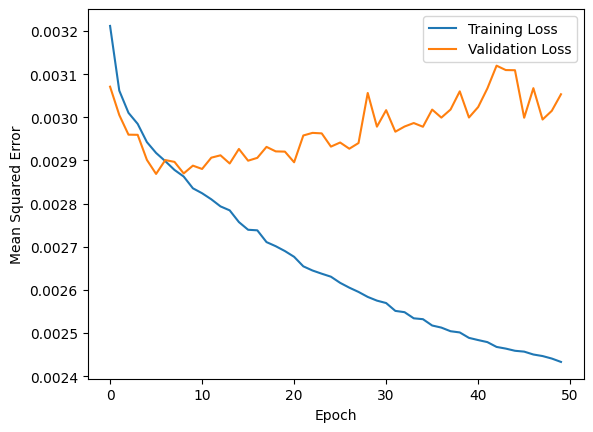

188/188 [==============================] - 1s 3ms/step - loss: 0.0031
Test Error: 0.0030949905049055815


In [ ]:
#let's try with another, deeper model.

# Step 3: Build the autoencoder (the model provided in assignment)
# Build and train the model with the updated number of epochs
best_model_key = 'deep5_color'
best_model_params = architectures[best_model_key]

AE = build_model(best_model_key, best_model_params, channels = 1, no_color = False)
AE.summary()

# Train the model with 20 epochs
trained_model = train_color_model(AE, (x_train_y), (x_train_crcb), (x_val_y), (x_val_crcb), _epochs = 50)


# Plot the training stats
plot_model_training_stats(trained_model)

# Report test error
report_test_error(AE, (x_test_y), (x_test_crcb))

There is clear overfitting, most probably due to the complexity of the model.

188/188 [==============================] - 0s 2ms/step


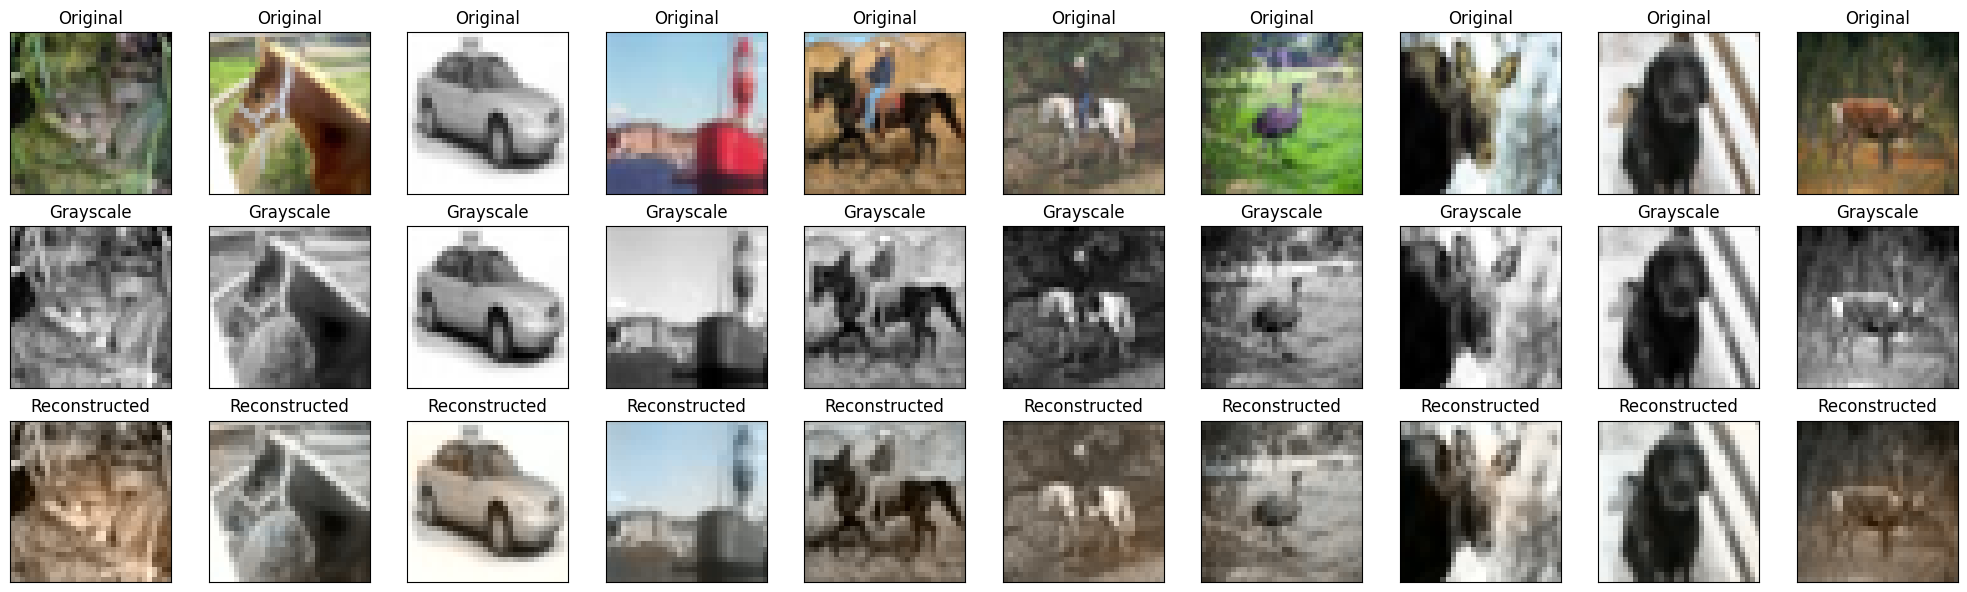

In [ ]:
# Predict the reconstructed Cb and Cr channels
predicted_crcb = AE.predict(x_test_y)

# Merge with Y channel and convert to RGB
reconstructed_images = merge_ycrcb_to_rgb(x_test_y, predicted_crcb)

plot_images(x_test, x_test_y, reconstructed_images)


Model: "base_simple_color"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 8)         136       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 16, 16, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 16)        2064      
                                                                 
 up_sampling2d_16 (UpSampli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 2)   

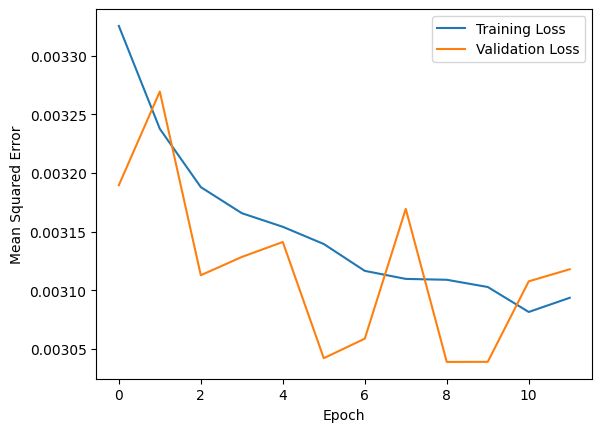

188/188 [==============================] - 1s 3ms/step - loss: 0.0032
Test Error: 0.0031822903547436


In [ ]:
#Try again the first one but with early stopping condition:
best_model_key = 'base_simple_color'
best_model_params = architectures[best_model_key]

AE = build_model(best_model_key, best_model_params, channels = 1, no_color = False)
AE.summary()

# Train the model with 20 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

trained_model = AE.fit(x_train_y, x_train_crcb, epochs=100, batch_size=64, shuffle=True,
                      validation_data=(x_val_y, x_val_crcb), callbacks=[early_stopping])


# Plot the training stats
plot_model_training_stats(trained_model)

# Report test error
report_test_error(AE, (x_test_y), (x_test_crcb))

188/188 [==============================] - 0s 2ms/step


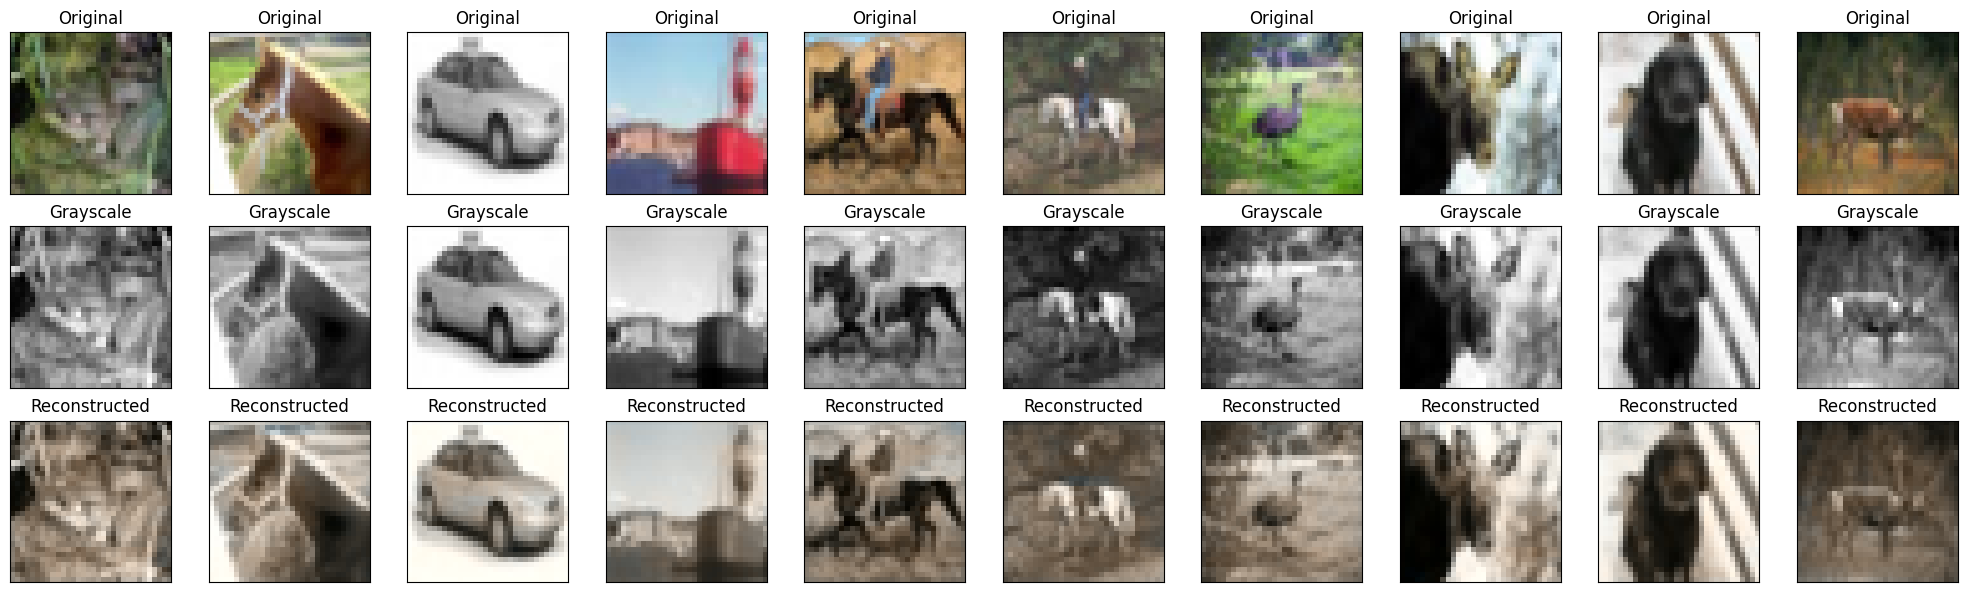

In [ ]:
# Predict the reconstructed Cb and Cr channels
predicted_crcb = AE.predict(x_test_y)

# Merge with Y channel and convert to RGB
reconstructed_images = merge_ycrcb_to_rgb(x_test_y, predicted_crcb)

plot_images(x_test, x_test_y, reconstructed_images)


Model: "base_simple_filter5_color"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_44 (Conv2D)          (None, 32, 32, 8)         208       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 16, 16, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 16)        3216      
                                                                 
 up_sampling2d_17 (UpSampli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 3

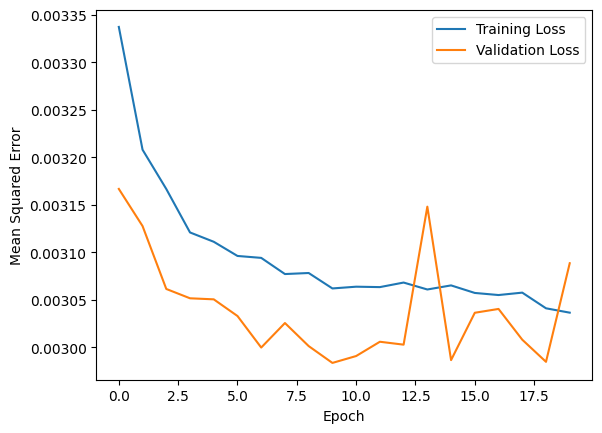

188/188 [==============================] - 1s 3ms/step - loss: 0.0031
Test Error: 0.0031132185831665993


In [ ]:
#cells for base model filter 5 if works well.
best_model_key = 'base_simple_filter5_color'
best_model_params = architectures[best_model_key]

AE = build_model(best_model_key, best_model_params, channels = 1, no_color = False)
AE.summary()

# Train the model with 20 epochs
trained_model = train_color_model(AE, (x_train_y), (x_train_crcb), (x_val_y), (x_val_crcb), _epochs = 20)


# Plot the training stats
plot_model_training_stats(trained_model)

# Report test error
report_test_error(AE, (x_test_y), (x_test_crcb))


188/188 [==============================] - 0s 2ms/step


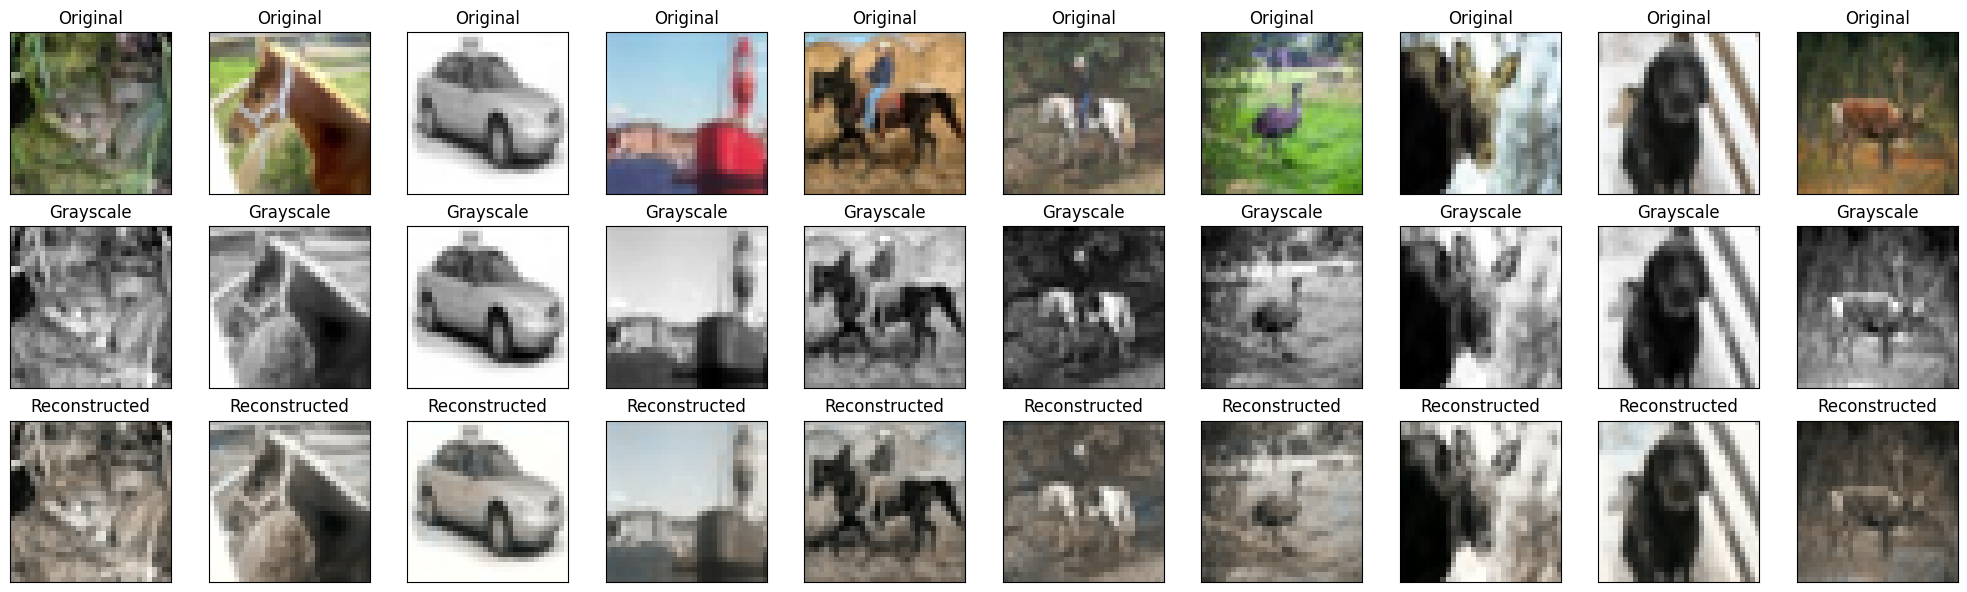

In [ ]:
# Predict the reconstructed Cb and Cr channels
predicted_crcb = AE.predict(x_test_y)

# Merge with Y channel and convert to RGB
reconstructed_images = merge_ycrcb_to_rgb(x_test_y, predicted_crcb)

plot_images(x_test, x_test_y, reconstructed_images)


In [ ]:
#TRY AGAIN WITH DIFFERENT IMAGES

In [ ]:

def plot_random_images(original_images, grayscale_images, reconstructed_images, n=10):
    """
    Plot a random selection of original, grayscale, and reconstructed images.

    Parameters:
    - original_images: List of original images.
    - grayscale_images: List of grayscale images.
    - reconstructed_images: List of reconstructed images.
    - n: Number of images to display (default is 10).
    """

    # Randomly select indices for display
    random_indices = random.sample(range(len(original_images)), n)

    plt.figure(figsize=(20, 6))

    for i, idx in enumerate(random_indices):
        # Display original images
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(original_images[idx])
        plt.title("Original")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display grayscale images
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(grayscale_images[idx].reshape(32, 32), cmap='gray')
        plt.title("Grayscale")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images
        ax = plt.subplot(3, n, i + 1 + n * 2)
        plt.imshow(reconstructed_images[idx])
        plt.title("Reconstructed")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()

188/188 [==============================] - 0s 2ms/step


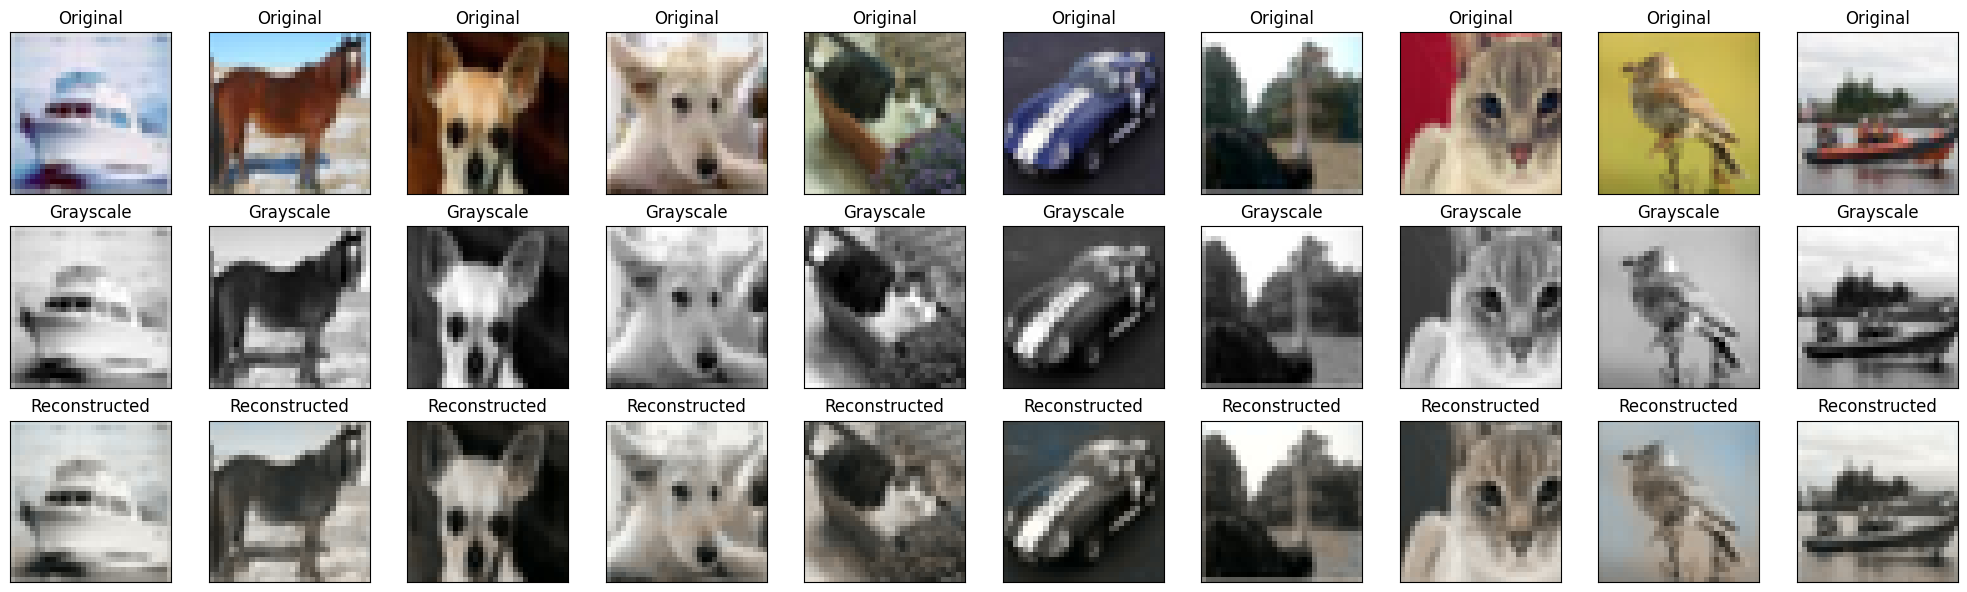

In [ ]:
# Predict the reconstructed Cb and Cr channels
predicted_crcb = AE.predict(x_test_y)

# Merge with Y channel and convert to RGB
reconstructed_images = merge_ycrcb_to_rgb(x_test_y, predicted_crcb)

plot_random_images(x_test, x_test_y, reconstructed_images)
